<p style=" background-color:darkseagreen;font-family:newtimeroman;font-size:200%;color:midnightblue;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b>🎥EDA Project - Netflix Titles 2021 🎞️</b></span></p>

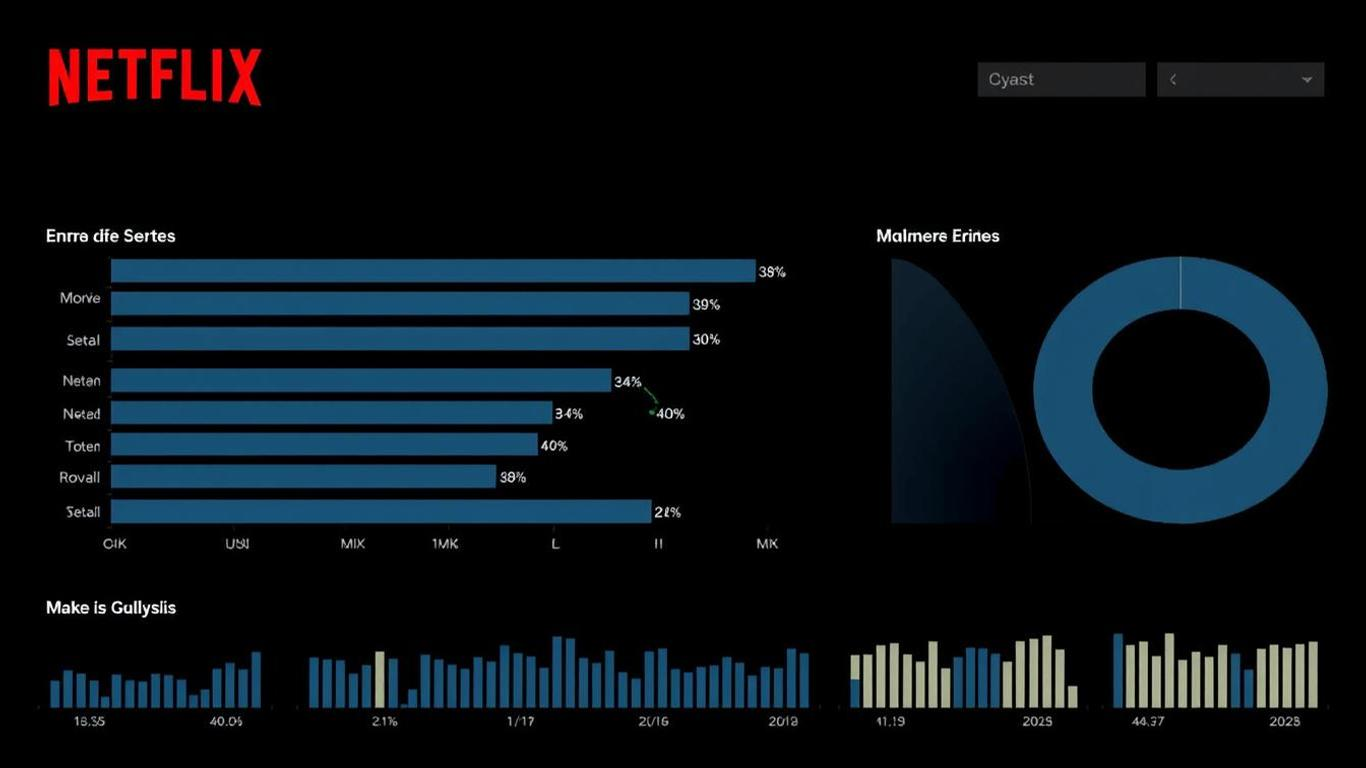

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Data Set</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
</ul>

<b>Column Descriptions of the Dataset:<b/>
<ul> <li><b>show_id</b>: A unique identifier for each show or movie in the dataset.</li> <li><b>type</b>: Indicates whether the entry is a "Movie" or a "TV Show."</li> <li><b>title</b>: The title of the movie or TV show.</li> <li><b>director</b>: The name of the director of the movie or show (if applicable).</li> <li><b>cast</b>: The list of main actors or cast members.</li> <li><b>country</b>: The country where the show or movie was produced.</li> <li><b>date_added</b>: The date when the movie or TV show was added to the streaming platform.</li> <li><b>release_year</b>: The year the movie or show was originally released.</li> <li><b>rating</b>: The age rating assigned to the movie or TV show (e.g., PG-13, TV-MA).</li> <li><b>duration</b>: The duration of the movie or number of seasons for TV shows.</li> <li><b>listed_in</b>: Categories or genres that the movie or TV show belongs to (e.g., "Documentaries," "TV Dramas").</li> <li><b>description</b>: A brief synopsis or description of the movie or TV show.</li> </ul>

<a id='import-library'></a>
# <font color='midnightblue'> <b>Importing Libraries</b><font color='black'> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from wordcloud import WordCloud


from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='midnightblue'> <b>Loading The Data Set</b><font color='black'> 

In [2]:
df0 = pd.read_csv("netflix_titles_2021.csv")
df = df0.copy()

In [3]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

<a id='understanding-dataset'></a>
# <font color='midnightblue'> <b>Understanding The Dataset</b><font color='black'> 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
df.describe( include = "O").T

count unique                                                top  \
show_id      8807   8807                                                 s1   
type         8807      2                                              Movie   
title        8807   8807                               Dick Johnson Is Dead   
director     6173   4528                                      Rajiv Chilaka   
cast         7982   7692                                 David Attenborough   
country      7976    748                                      United States   
date_added   8797   1767                                    January 1, 2020   
rating       8803     17                                              TV-MA   
duration     8804    220                                           1 Season   
listed_in    8807    514                       Dramas, International Movies   
description  8807   8775  Paranormal activity at a lush, abandoned prope...   

             freq  
show_id         1  
type         6131  
title           1  
director       19  
cast           19  
country      2818  
date_added    109  
rating       3207  
duration     1793  
listed_in     362  
description     4

In [8]:
df.duplicated().sum()

0

In [9]:
df.release_year.unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [10]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8807   │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ release_year      │    0 │      0 │   2014 │   8.819 │   1925 │   2013 │   2017 │   2019 │  2021 │     ▁▇  │  │
│ └───────────────────┴──────┴────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ show_id                  │          0 │            0 │                          1 │                   8807 │  │
│ │ type                     │          0 │            0 │                        1.3 │                  11483 │  │
│ │ title                    │          0 │            0 │                        3.1 │                  27391 │  │
│ │ director                 │       2634 │        29.91 │                        1.7 │                  14691 │  │
│ │ cast                     │        825 │         9.37 │                         15 │                 132059 │  │
│ │ country                  │        831 │         9.44 │                        1.7 │                  15066 │  │
│ │ date_added               │         10 │         0.11 │                          3 │                  26479 │  │
│ │ rating                   │          4 │         0.05 │                          1 │                   8806 │  │
│ │ duration                 │          3 │         0.03 │                          2 │                  17608 │  │
│ │ listed_in                │          0 │            0 │                        4.5 │                  39221 │  │
│ │ description              │          0 │            0 │                         24 │                 210327 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<a id='organizing-columns'></a>
# <font color='midnightblue'> <b>Organizing Columns</b><font color='black'> 

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

In [12]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [13]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
df['rating'] = df[~df['rating'].isin(['74 min', '84 min', '66 min'])]['rating']

In [15]:
df['rating'] = df['rating'].replace( {'TV-MA':'Adults',
                                      'R':'Adults',
                                      'PG-13':'Teens',
                                      'TV-14':'Teens and Older',
                                      'TV-PG':'Older Children',
                                      'NR':'Adults',
                                      'TV-G':'Children',
                                      'TV-Y':'Children',
                                      'TV-Y7':'Older Children',
                                      'PG':'Older Children',
                                      'G':'Children',
                                      'NC-17':'Adults',
                                      'TV-Y7-FV':'Older Children',
                                      'UR':'Adults'})

In [16]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year  rating   duration  \
0 2021-09-25          2020   Teens     90 min   
1 2021-09-24          2021  Adults  2 Seasons   
2 2021-09-24          2021  Adults   1 Season   
3 2021-09-24          2021  Adults   1 Season   
4 2021-09-24          2021  Adults  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [17]:
df = df.drop(columns=['description'])

<a id='nan-values'></a>
# <font color='midnightblue'> <b>NaN Values</b><font color='black'> 

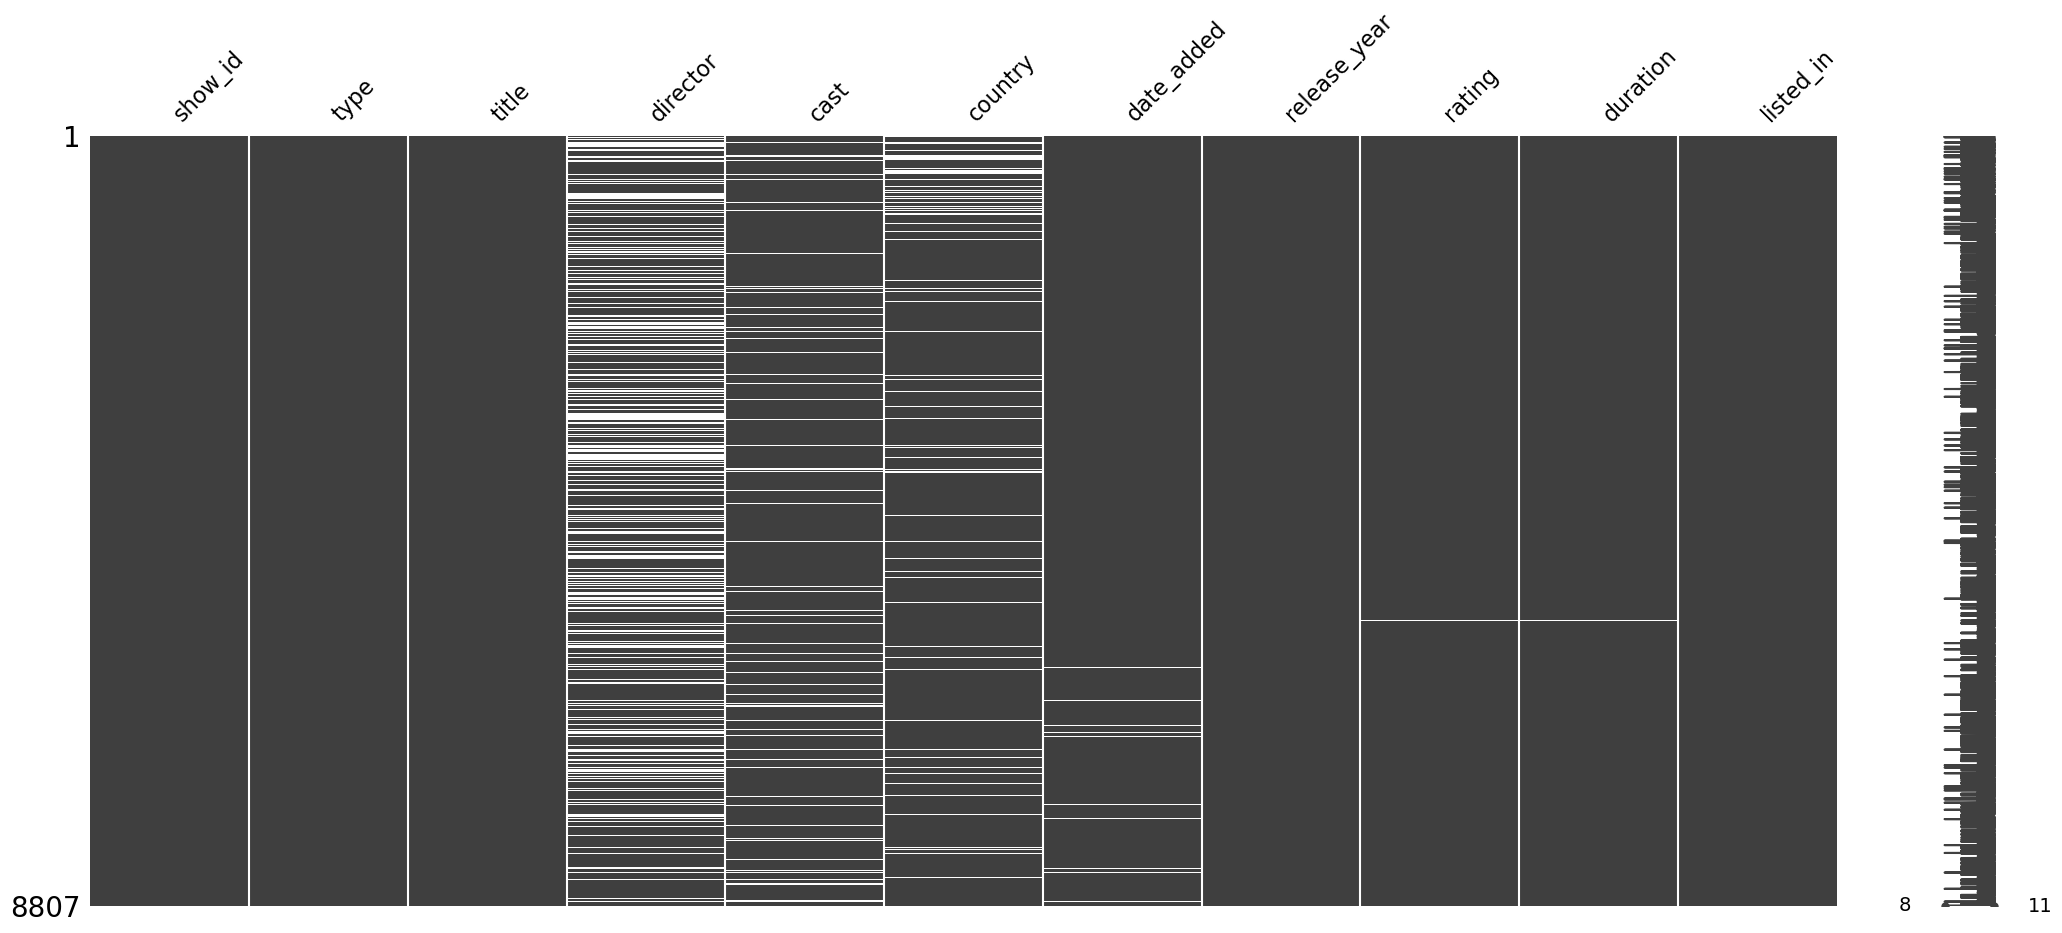

In [18]:
msno.matrix(df);

In [19]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             7
duration           3
listed_in          0
dtype: int64

In [20]:
df[['director','cast','country','date_added']] = df[['director','cast','country','date_added']].fillna('unknown')

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

<a id='data-visualization'></a>
# <font color='midnightblue'> <b>Data Visualization</b><font color='black'> 

 ## Display Number of contents in last 4 Year

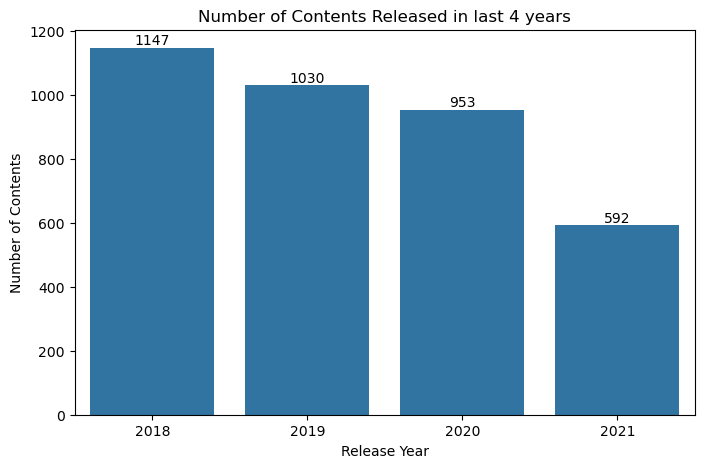

In [23]:
df_filtered = df[df['release_year'].isin([2018, 2019, 2020, 2021])]

content_count = df_filtered['release_year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=content_count.index, y=content_count.values)

plt.xlabel('Release Year')
plt.ylabel('Number of Contents')
plt.title('Number of Contents Released in last 4 years')

for i, value in enumerate(content_count.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
    
plt.show()


## Display Number of TV Shows and Movies in last 4 Year

In [24]:
df_filtered.groupby(['release_year', 'type']).size().reset_index(name='counts')

release_year     type  counts
0          2018    Movie     767
1          2018  TV Show     380
2          2019    Movie     633
3          2019  TV Show     397
4          2020    Movie     517
5          2020  TV Show     436
6          2021    Movie     277
7          2021  TV Show     315

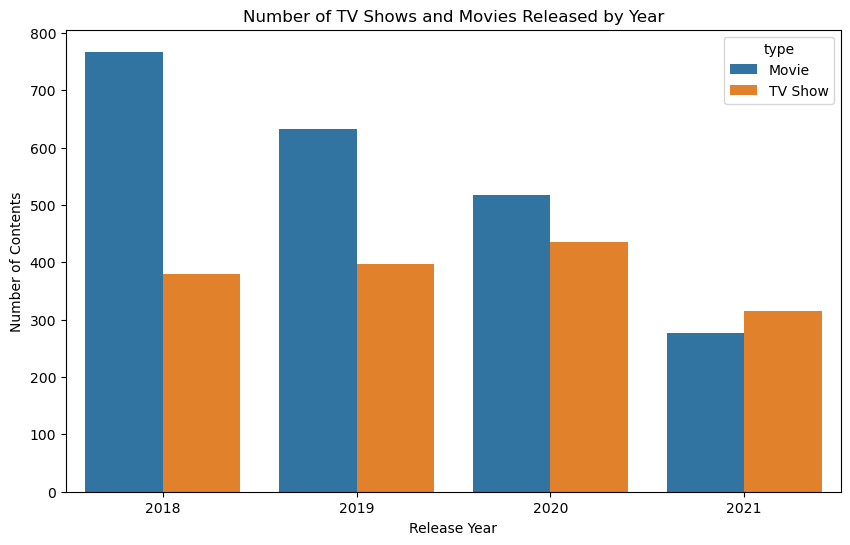

In [25]:
df_filtered = df[df['release_year'].isin([2018, 2019, 2020, 2021])]

content_count = df_filtered.groupby(['release_year', 'type']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
sns.barplot(x='release_year', y='counts', hue='type', data=content_count)

plt.xlabel('Release Year')
plt.ylabel('Number of Contents')
plt.title('Number of TV Shows and Movies Released by Year')

plt.show()

## Display the difference between number of  Movie and TV Show

In [26]:
df.type.value_counts()

type
Movie      6126
TV Show    2674
Name: count, dtype: int64

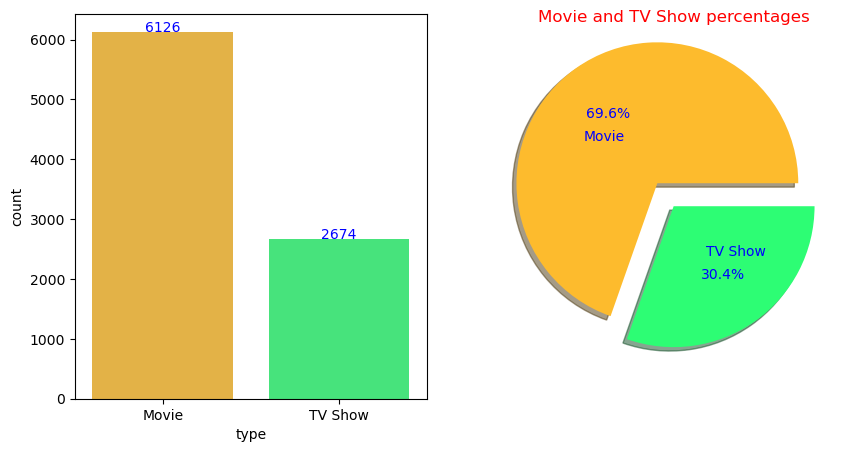

In [27]:
color_list = ["#fdbb2d", "#2dfd74"]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(data = df, x = "type", ax = ax[0], palette = color_list)
plt.pie(df.type.value_counts(), labels = df.type.unique(), pctdistance = 0.6, labeldistance = 0.4,
         autopct = '%1.1f%%', shadow = True, colors= color_list, explode = [0.2,0], textprops={'color': 'blue'})

plt.title('Movie and TV Show percentages', color = 'red')

for p in ax[0].patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2  

    ax[0].annotate(
        f"{int(height)}",
        (x, height + 1),  
        ha='center', 
        color='blue',  
        fontsize=10  
    )
    
plt.show()

## Display the top 10 most common categories.

In [28]:
df['listed_in'].str.split(',', expand=True).stack().value_counts()

 International Movies            2624
Dramas                           1599
Comedies                         1210
Action & Adventure                859
Documentaries                     829
 Dramas                           827
International TV Shows            774
 Independent Movies               736
 TV Dramas                        696
 Romantic Movies                  613
Children & Family Movies          605
 International TV Shows           576
 Thrillers                        512
 Comedies                         464
 TV Comedies                      460
Crime TV Shows                    399
Kids' TV                          387
 Music & Musicals                 357
 Romantic TV Shows                338
Stand-Up Comedy                   334
Horror Movies                     275
British TV Shows                  253
 Sci-Fi & Fantasy                 230
Docuseries                        221
 Sports Movies                    218
Anime Series                      175
 Docuseries 

In [29]:
df['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts()

International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      580
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [30]:
top_categories = df['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts()[:10]

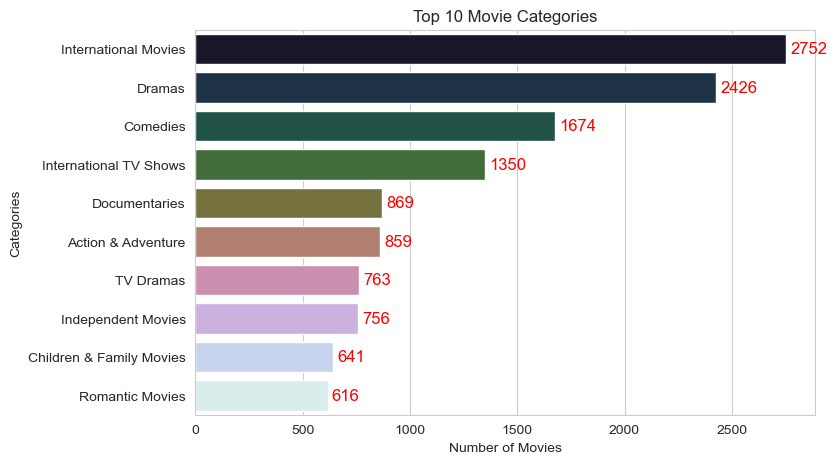

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette="cubehelix")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='red', padding=3)
    
ax.set(xlabel='Number of Movies', ylabel='Categories')
plt.title("Top 10 Movie Categories")

plt.show()

## Display number of ratings

In [32]:
ratings = df['rating'].str.split(',', expand=True).stack().str.strip().value_counts()
ratings

Adults             4092
Teens and Older    2160
Older Children     1490
Children            568
Teens               490
Name: count, dtype: int64

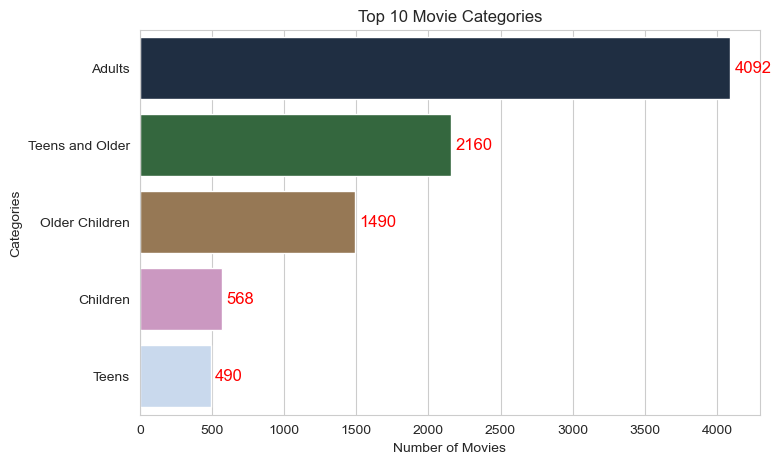

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=ratings.values, y=ratings.index, palette="cubehelix")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='red', padding=3)
    
ax.set(xlabel='Number of Movies', ylabel='Categories')
plt.title("Top 10 Movie Categories")

plt.show()

## Display top 5 actors 

In [35]:
top_five_actors = df['cast'].str.split(',', expand=True).stack().str.strip().value_counts()[1:6]
top_five_actors

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Name: count, dtype: int64

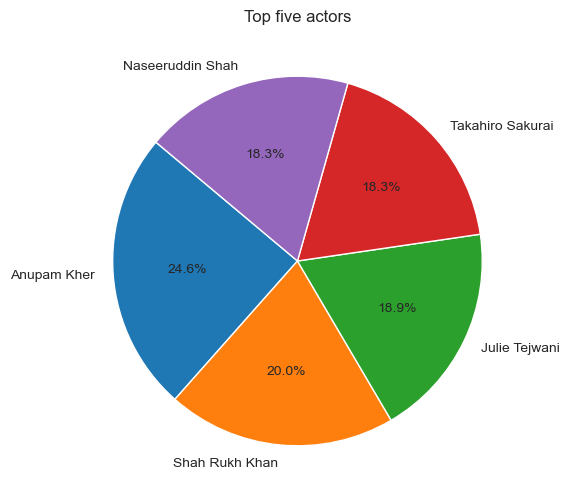

In [36]:
plt.figure(figsize=(6, 6))
plt.pie(top_five_actors.values, labels=top_five_actors.index, autopct='%1.1f%%', startangle=140)
plt.title('Top five actors')
plt.show()

## Display Distribution of Movies and TV Shows by Country

In [37]:
country_distribution = df['country'].str.split(', ', expand=True).stack().value_counts()

country_distribution = country_distribution[country_distribution > 12]

country_distribution.reset_index()

index  count
0          United States   3686
1                  India   1046
2                unknown    830
3         United Kingdom    804
4                 Canada    445
5                 France    393
6                  Japan    317
7                  Spain    232
8            South Korea    231
9                Germany    226
10                Mexico    169
11                 China    162
12             Australia    159
13                 Egypt    117
14                Turkey    113
15             Hong Kong    105
16               Nigeria    103
17                 Italy     99
18                Brazil     97
19             Argentina     91
20               Belgium     90
21             Indonesia     90
22                Taiwan     89
23           Philippines     83
24              Thailand     70
25          South Africa     62
26              Colombia     52
27           Netherlands     50
28               Denmark     48
29               Ireland     46
30                Sweden     42
31             Singapore     41
32                Poland     40
33  United Arab Emirates     37
34           New Zealand     33
35               Lebanon     31
36                Norway     30
37                Israel     30
38                 Chile     29
39                Russia     27
40              Malaysia     26
41              Pakistan     24
42        Czech Republic     22
43           Switzerland     19
44               Romania     14
45               Uruguay     14
46          Saudi Arabia     13

In [38]:
country_data = country_distribution.reset_index()
country_data.columns = ['country', 'count']


fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale=px.colors.diverging.Temps,
    title='Distribution of Movies and TV Shows by Country'
)


fig.update_layout(
    title=dict(text='Distribution of Movies and TV Shows by Country', font=dict(color='red')),
    title_x=0.5,  # Başlığı ortalamak için
    width=900,
    height=600
)

fig.show()

## Display Top 10 Directors Genre Choice Distribution

In [39]:
data = df.copy()
data = data.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
data['listed_in'] = data['listed_in'].str.strip()
director_counts = data['director'].value_counts()
top_20_directors = director_counts[1:11].index
df_top_20 = data[data['director'].isin(top_20_directors)]
grouped_data = df_top_20.groupby(['director', 'listed_in']).size().unstack(fill_value=0)

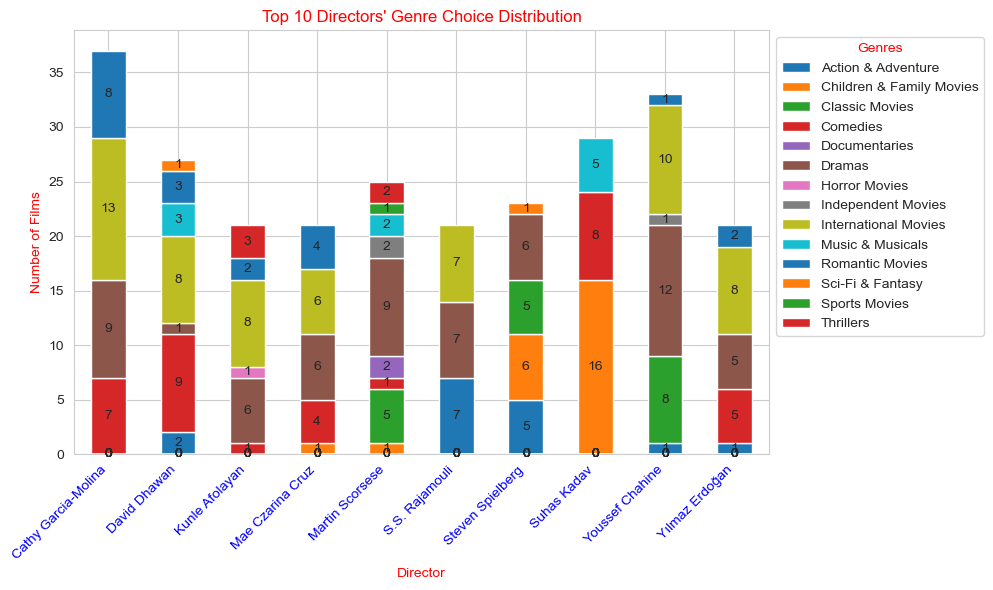

In [40]:
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.title('Top 10 Directors\' Genre Choice Distribution', color='red')
plt.xlabel('Director', color='red')
plt.ylabel('Number of Films', color='red')
plt.xticks(rotation=45, ha='right', color='blue')

legend = plt.legend(title='Genres', loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_color('red')

plt.tight_layout()  
plt.show()

<p style=" background-color:darkseagreen;font-family:newtimeroman;font-size:200%;color:midnightblue;text-align:center;border-radius:20px 20px;"><span  style = "padding : 30px; display : block; "><b>🎥THANK YOU!</b></span></p>